### Utility Functions

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import numpy as np
import pickle

import matplotlib.pyplot as plt

In [ ]:
def general_eval(nn_eval , test_loader, optimizer):
    test_count =[]
    test_acc =[]
    test_error = []
    test_loss = []
    test_total =0
    test_correct = 0
    test_wrong = 0
    test_loss_tot = 0

    nn_eval.eval()

    with torch.no_grad():

          for i, (test_images, test_labels) in enumerate(test_loader):
                test_images = test_images.to(device)
                test_labels = test_labels.to(device)

                 # Forward only
                test_outputs = nn_eval(test_images)
                _, predicted_test = torch.max(test_outputs.data, 1)

                test_total += test_labels.size(0)
                test_correct += (predicted_test == test_labels).sum().item()
                test_wrong += (predicted_test != test_labels).sum().item()
                test_loss_current = F.cross_entropy(test_outputs, test_labels)
                test_loss_tot += test_loss_current.detach().numpy()

                test_count.append(test_total)
                test_acc.append(test_correct/ test_total)
                test_error.append(test_wrong / test_total)
                test_loss.append(test_loss_tot/ test_total)


    plt.plot(test_count,test_acc , color = 'green')
    plt.title("Accuracy Value")
    plt.xlabel("Number of Samples")
    plt.ylabel("Accuracy")
    plt.show()

    plt.plot(test_count,test_error ,color = 'orange' , label= "test")
    plt.title("Error Value per Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend()
    plt.show()

    plt.plot(test_count, test_loss, color = '#6cd4c5',label= "test")
    plt.title("Loss Value per Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    print(f'acc is: {100 * sum(test_acc) / len(test_acc)}')

In [ ]:
device= torch.device('cuda' if torch.cuda.is_available () else 'cpu')
print (device)

cpu


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=12, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(12),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=16, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(16),
            nn.AvgPool2d(kernel_size=4, stride=2, padding=2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(32),
            nn.AvgPool2d(kernel_size=4, stride=2, padding=2),
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=4, stride=3, padding=2)
        )
        self.linear = nn.Linear(64 * 3 * 3, 10)
        self.dropout = nn.Dropout(p=0.3)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)

        out = out.view(out.size(0), -1)
        out = self.dropout(out)
        out = self.linear(out)

        return self.logsoftmax(out)


### Eval

In [ ]:
def evaluate_model_q1():

  # Dataset Loader (Input Pipline)
  transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2023, 0.1994, 0.2010)),
  ])

  test_dataset = dsets.CIFAR10(root='./data/',
                              train=False,
                              transform=transform,
                              download=True)

  test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

  # Set up cutom optimizer with weight decay
  max_lr = 0.01
  weight_decay = 1e-4
  optimizer = torch.optim.Adam(cnn.parameters(), max_lr, weight_decay=weight_decay)

  #load my trained network
  nn_eval = pickle.load(open("train_hw2_206238891_CNN.pkl", 'rb'))
  general_eval(nn_eval, test_loader, optimizer)

Files already downloaded and verified


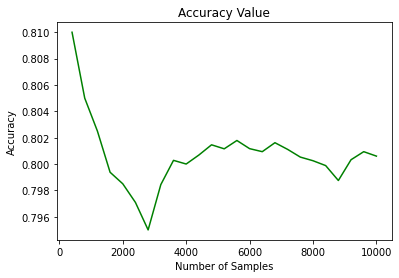

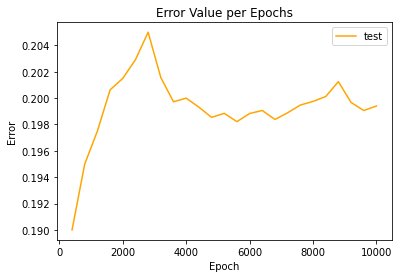

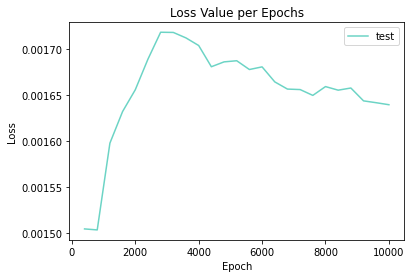

acc is: 80.06942841211747


In [ ]:
evaluate_model_q1()